참고 : https://github.com/DNRY/dlopt

### Chapter 8
### 선형회귀 모델


#### 예측 모델과 손실함수

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

In [ ]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

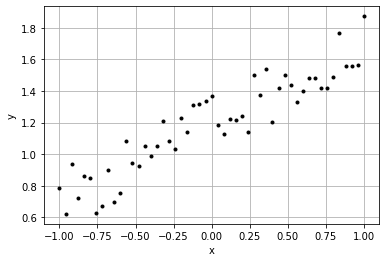

In [ ]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###### 주의
아래 코드들은 결정론적 방법에서 예제를 사용하기 위한 준비과정과, 예제들인데,   
1.0 Version에서 호환되던 None이라는 것이 2.0에서 placeholder와 함께 삭제가 되었고 2.0 Version에서 이것과 호환되는 개념이 뭔지 몰라서, tensorflow가 제공한 1.0 코드를 2.0으로 임의로 바꾸는 명령어를 통해 바꾸었다.

*추후 Session과 compat.v1을 쓰지 않는 방법을 찾게 된다면, 바꿀것이다.*
###### **2022-04-04 추가**
며칠 전까지만 해도 방법이 뭔지 몰라 어쩔 수 없이 1.0 Version 코드를 사용하였으나 며칠간 골머리를 썩힌 끝에 문제를 해결하였다.
1.0 Version 다음에 있는 코드가 바로 끝내 2.0 Version으로 변환이 완료된 코드이다. 비교를 위해 두개 다 남겨놓도록 하겠다.

혹시나 오류가 발견된다면 필자에게 꼭 연락을 주길 바란다.

In [ ]:
#tf.compat.v1.disable_eager_execution()

# 기울기와 y절편
# w = tf.Variable(tf.ones([1,1]), dtype=tf.float32)
# b = tf.Variable(tf.ones([1]), dtype=tf.float32)

# # 데이터 x좌표
# x = tf.compat.v1.placeholder(tf.float32, [None, 1])
# print(x)

# # 예측 모델
# yhat = tf.matmul(x,w) + b

Tensor("Placeholder_3:0", shape=(None, 1), dtype=float32)


In [ ]:
# 데이터 y좌표
# y = tf.compat.v1.placeholder(tf.float32, [None, 1])

# # 손실함수
# loss = tf.reduce_mean(input_tensor=tf.square(yhat - y))

# # 수치최적화 알고리즘 설정
# MaxEpoch = 25
# lr = 0.25
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(lr)
# train = optimizer.minimize(loss)

In [ ]:
# 결정론적 방법
# init = tf.compat.v1.global_variables_initializer()
# with tf.compat.v1.Session() as sess:
#     sess.run(init)
#     for epoch in range(MaxEpoch):
#         if epoch % 5 == 0:
#             curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
#             print(curr_w, curr_b, curr_loss)
#         sess.run(train, feed_dict={x:x_train, y:y_train})
#     w_tf_gd, b_tf_gd = sess.run([w, b])

[[1.]] [1.] 0.14998727
[[0.6727577]] [1.1888978] 0.028191052
[[0.54642326]] [1.1948009] 0.015662618
[[0.49765092]] [1.1949854] 0.013800872
[[0.478822]] [1.1949911] 0.013523399


In [ ]:
#결정론적 방법
# init = tf.compat.v1.global_variables_initializer()
# with tf.compat.v1.Session() as sess:
#     sess.run(init)
#     for epoch in range(MaxEpoch):
#         sess.run(train, feed_dict={x:x_train, y:y_train})
#     w_tf_gd, b_tf_gd = sess.run([w, b])

###### 1.0 버젼에서 2.0으로 바꾼 버젼.
바꾸기 위해서 걸린 경과 시간 : 약 1주일 이상.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

In [ ]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

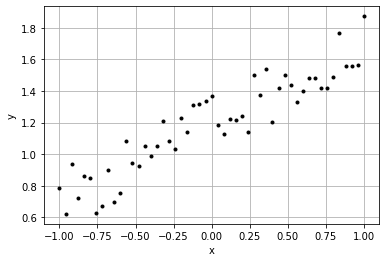

In [ ]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
W = tf.Variable(tf.ones([1, 1]), dtype=tf.float32)
b = tf.Variable(([[1]]), dtype=tf.float32)
#b = tf.Variable(tf.random.normal(shape=[1]), dtype=tf.float32)

cx_train = tf.constant(x_train, dtype=tf.float32)
cy_train = tf.constant(y_train, dtype=tf.float32)

@tf.function
def linear_model(x):
  return W*x+b

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_pred = linear_model(x)
    loss = tf.reduce_mean(tf.square(y_pred - y))
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

epochs = 25

for i in range(epochs):
  train_step(cx_train, cy_train)

x_test = [0.5, 3.5, 7.0, 10]

print(linear_model(x_test).numpy)
    

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1.4307677, 2.8454266, 4.495862 , 5.9105206]], dtype=float32)>>


----------------------------------------------------------------------

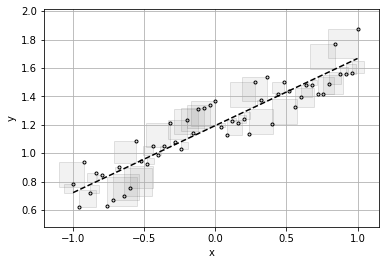

In [ ]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

visualize_l2(W, b, cx_train, cx_train, cy_train)

#### 결정론적 방법과 스토캐스틱 방법

##### 결정론적 방법

책에 있는 코드를 위에 적어놓았으니 확인 바람.

##### 스토캐스틱 방법

In [ ]:
# 데이터 섞기
# np.random.seed(320)
# shuffled_id = np.arange(0, len(x_train))
# np.random.shuffle(shuffled_id)
# shuffled_x_train = x_train[shuffled_id]
# shuffled_y_train = y_train[shuffled_id]

In [ ]:
# 스토캐스틱 방법
# def generate_batches(batch_size, features, labels):
#     outout_batches = []
#     sample_size = len(features)
#     for start_i in range(0, sample_size, batch_size):
#         end_i = start_i + batch_size
#         batch = [features[start_i:end_i], labels[start_i:end_i]]
#         outout_batches.append(batch)
#     return outout_batches

# batch_size = 5
# init = tf.compat.v1.global_variables_initializer()
# with tf.compat.v1.Session() as sess:
#     sess.run(init)
#     for epoch in range(MaxEpoch):
#         if epoch % 5 == 0:
#             curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
#             print(curr_w, curr_b, curr_loss)
#         for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
#             sess.run(train, feed_dict={x:x_batch, y:y_batch}) # 반드시 미니 뱃치가 들어가야합니다.
    
#     w_tf_sgd, b_tf_sgd = sess.run([w, b])

In [ ]:
# visualize_l2(w_tf_gd, b_tf_gd, x_train, x_train, y_train)

##### 스토캐스틱 방법 Tensorflow 2.0 Version Code

스토캐스틱 방법으로 코딩을 하려고 하니....   
위에서 변환한 코드에 있는 SGD가 Stochastic Gradient Descent라고 한다...   
그러므로 이 단락에서는 위의 코드를 참고하여 작성해주길 바란다.

필자는 BGD 방법도 찾아보았으나 현재 2.0에서는 아마도 본인이 직접 노가다를 하지 않는 이상은 함수차원에서 지원해주지 않는 것으로 보인다.    

아마 비효율적인 방법이라서 함수 차원에서 제거한 것으로 보인다.

In [ ]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [ ]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]

In [ ]:
W = tf.Variable(tf.ones([1, 1]), dtype=tf.float32)
b = tf.Variable(([[1]]), dtype=tf.float32)
#b = tf.Variable(tf.random.normal(shape=[1]), dtype=tf.float32)

cx_train = tf.constant(x_train, dtype=tf.float32)
cy_train = tf.constant(y_train, dtype=tf.float32)

@tf.function
def linear_model(x):
  return W*x+b

@tf.function
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

batch_size = 5

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_pred = linear_model(x)
    loss = tf.reduce_mean(tf.square(y_pred - y))
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

epochs = 25

for i in range(epochs):
  train_step(cx_train, cy_train)
  if epochs % 5 == 0:
    tf.print(W, b)

# batch_size 넣어서 print 하는 방법은 잘 모르겠음... 어떻게 적용되는 지도 모르겠음...

# x_test = [0.5, 3.5, 7.0, 10]

# print(linear_model(x_test).numpy)

[[0.907610238]] [[1.09749568]]
[[0.831234694]] [[1.14624345]]
[[0.768097579]] [[1.17061734]]
[[0.715904236]] [[1.18280435]]
[[0.672757745]] [[1.18889785]]
[[0.637089968]] [[1.1919446]]
[[0.607604563]] [[1.19346797]]
[[0.583229959]] [[1.1942296]]
[[0.563080311]] [[1.19461048]]
[[0.546423256]] [[1.19480085]]
[[0.532653451]] [[1.1948961]]
[[0.521270394]] [[1.19494367]]
[[0.51186043]] [[1.19496751]]
[[0.504081488]] [[1.19497943]]
[[0.497650921]] [[1.19498539]]
[[0.492334962]] [[1.19498837]]
[[0.48794046]] [[1.1949898]]
[[0.484307677]] [[1.19499052]]
[[0.481304556]] [[1.19499087]]
[[0.478822]] [[1.19499111]]
[[0.476769716]] [[1.19499123]]
[[0.475073189]] [[1.19499123]]
[[0.473670721]] [[1.19499123]]
[[0.472511351]] [[1.19499123]]
[[0.471552938]] [[1.19499123]]


In [ ]:
W = tf.Variable(tf.ones([1, 1]), dtype=tf.float32)
b = tf.Variable(([[1]]), dtype=tf.float32)
#b = tf.Variable(tf.random.normal(shape=[1]), dtype=tf.float32)

cx_train = tf.Variable(x_train, dtype=tf.float32)
cy_train = tf.Variable(y_train, dtype=tf.float32)

@tf.function
def linear_model(x):
  return W*x+b

@tf.function
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

batch_size = 5

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_pred = linear_model(x)
    loss = tf.reduce_mean(tf.square(y_pred - y))
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

epochs = 25

for i in range(epochs):
  train_step(cx_train, cy_train)
  if epochs % 5 == 0:
    tf.print(W, b)


# x_test = [0.5, 3.5, 7.0, 10]

# print(linear_model(x_test).numpy)

[[0.907610238]] [[1.09749568]]
[[0.831234694]] [[1.14624345]]
[[0.768097579]] [[1.17061734]]
[[0.715904236]] [[1.18280435]]
[[0.672757745]] [[1.18889785]]
[[0.637089968]] [[1.1919446]]
[[0.607604563]] [[1.19346797]]
[[0.583229959]] [[1.1942296]]
[[0.563080311]] [[1.19461048]]
[[0.546423256]] [[1.19480085]]
[[0.532653451]] [[1.1948961]]
[[0.521270394]] [[1.19494367]]
[[0.51186043]] [[1.19496751]]
[[0.504081488]] [[1.19497943]]
[[0.497650921]] [[1.19498539]]
[[0.492334962]] [[1.19498837]]
[[0.48794046]] [[1.1949898]]
[[0.484307677]] [[1.19499052]]
[[0.481304556]] [[1.19499087]]
[[0.478822]] [[1.19499111]]
[[0.476769716]] [[1.19499123]]
[[0.475073189]] [[1.19499123]]
[[0.473670721]] [[1.19499123]]
[[0.472511351]] [[1.19499123]]
[[0.471552938]] [[1.19499123]]


#### 비선형회귀 모델

참고 : https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch?hl=ko

참고 2 : https://www.tensorflow.org/tutorials/quickstart/advanced?hl=ko

참고 3 : https://hwiyong.tistory.com/110

참고 4 : https://kibua20.tistory.com/206

참고 5 : https://dschloe.github.io/python/tensorflow2.0/ch4_1_linear_regression/

##### 이차 곡선 데이터

In [ ]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

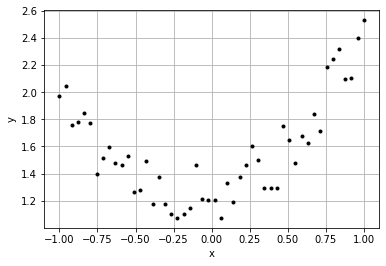

In [ ]:
# 분포도
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###### Model 시도

In [ ]:
import numpy as np
import tensorflow as tf

np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

W = tf.Variable(tf.ones([2, 1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

x = tf.constant(x_train, dtype=tf.float32)
y = tf.constant(y_train, dtype=tf.float32)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

opt = tf.keras.optimizers.SGD(learning_rate=0.25)

model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(x_train, y_train, batch_size = 10, epochs = 25)

print(model.predict(np.array([5])))

cW = model.layers[0].get_weights()
print(cW)
cb = model.layers[0].get_weights()[1]

Epoch 1/25
5/5 [==============================] - 0s 3ms/step - loss: 0.8161
Epoch 2/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1385
Epoch 3/25
5/5 [==============================] - 0s 4ms/step - loss: 0.1365
Epoch 4/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 5/25
5/5 [==============================] - 0s 4ms/step - loss: 0.1270
Epoch 6/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1328
Epoch 7/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1288
Epoch 8/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1263
Epoch 9/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1269
Epoch 10/25
5/5 [==============================] - 0s 4ms/step - loss: 0.1324
Epoch 11/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 12/25
5/5 [==============================] - 0s 3ms/step - loss: 0.1323
Epoch 13/25
5/5 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

In [ ]:
# 특성값 정의
features = np.array([[xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


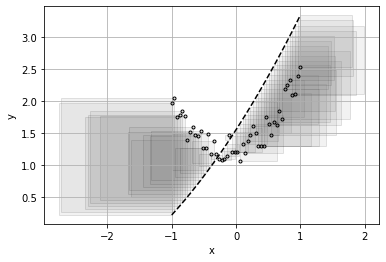

In [ ]:
visualize_l2(cW, cb, features, x, y)

###### 일반적인 SGD 방법 시도

In [ ]:
# 특성값 정의
features = np.array([[xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [ ]:
# 예측 모델과 손실함수
W = tf.Variable(tf.ones([2, 1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

x = tf.constant(x_train, dtype=tf.float32)
y = tf.constant(y_train, dtype=tf.float32)

@tf.function
def linear_model(x):
  yhat = W * x + b 
  loss = tf.reduce_mean(tf.square(yhat - y))
  return loss

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_pred = linear_model(x)
    loss = tf.reduce_mean(tf.square(y_pred - y))
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

@tf.function
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [ ]:
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

In [ ]:
epochs = 25
batch_size=10

for epochs in range(epochs):
  train_step(x, y)
  if epochs % 5 == 0:
    print(epochs, 'W:', W.numpy(), 'b:', b.numpy(), 'loss:', linear_model(x).numpy())
  # for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):

0 W: [[1.4520937]
 [1.4520937]] b: [0.7021605] loss: 1.3856872
5 W: [[1.4972802]
 [1.4972802]] b: [0.5541467] loss: 1.7031583
10 W: [[1.4758898]
 [1.4758898]] b: [0.6830716] loss: 1.4394655
15 W: [[1.5067115]
 [1.5067115]] b: [0.57601845] loss: 1.6675366
20 W: [[1.4895674]
 [1.4895674]] b: [0.66831106] loss: 1.4776955


In [ ]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx, yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

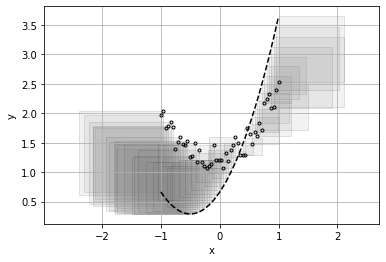

In [ ]:
visualize_l2(W, b, features, x, y)

###### 책이 아닌 다른 코드를 가져와 해결함.
출처 : https://dschloe.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/

0 a: 0.72535217 b: 0.8472146 c: 1.0464598 loss: 0.23006669
5 a: 0.8581077 b: 0.470352 c: 1.2726119 loss: 0.039387546
10 a: 0.8925989 b: 0.32498103 c: 1.2638022 loss: 0.021845382
15 a: 0.91924113 b: 0.26890564 c: 1.2537663 loss: 0.018747263
20 a: 0.94066596 b: 0.2472751 c: 1.2456437 loss: 0.017968439


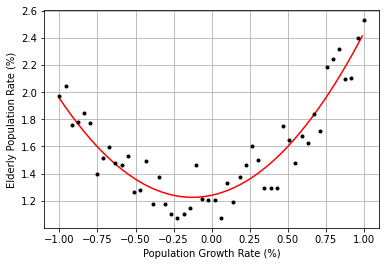

In [ ]:
import tensorflow as tf
import numpy as np

# 모듈을 가져옵니다. 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = x_train
Y = y_train

# a와 b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다. 
def compute_loss(): 
  # 책의 본문(p, 83)은 아래처럼 되어 있지만, 에러가 날 것이다. 
  # y_pred = a*X**2 + b*X + c
  y_pred = a * X * X + b * X + c 
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

for i in range(25): 
  # 잔차의 제곱의 평균을 최소화합니다. 
  optimizer.minimize(compute_loss, var_list=[a, b, c])

  if i % 5 == 0: 
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'-r')
plt.plot(X,Y,'.k')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#visualize_l2(W, b, features, X, Y)

##### 3차 곡선 데이터

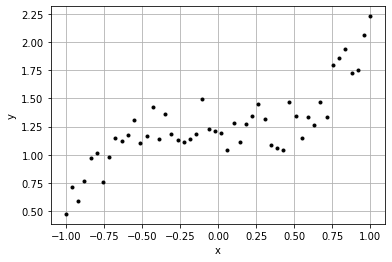

In [ ]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2  -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 특성값 정의
features = np.array([[xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

###### 2차 곡선에 쓰인 그대로 3차에 써봤지만. 정답이 아니었음.
스토캐스틱 방법이 아니라서 적은 반복회수에도 제대로 작동하지 않았음.


링크 : https://ayoteralab.tistory.com/entry/Tensorflow-20-04-Simple-Linear-Regression-2

0 a: 0.8829737 b: 0.7214818 c: 0.6266551 d: 0.9099939 loss: 0.24042445
500 a: 0.99889827 b: 0.12900914 c: -0.16545944 d: 1.2121469 loss: 0.01714595
1000 a: 1.0035198 b: 0.12900913 c: -0.16850348 d: 1.2121469 loss: 0.01714538
1500 a: 1.0035641 b: 0.12900913 c: -0.16853286 d: 1.2121469 loss: 0.017145377


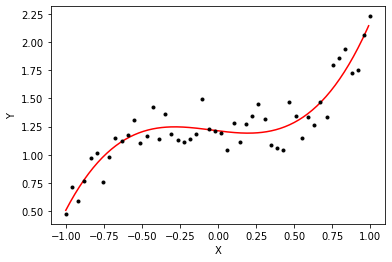

In [ ]:
# 예측 모델과 손실함수
# W = tf.Variable(tf.ones([3, 1]), dtype=tf.float32)
# b = tf.Variable(tf.ones([1]), dtype=tf.float32)

X = x_train
Y = y_train

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

@tf.function
def compute_loss(): 
  # y_pred = a*X**3 + b*X**2 + c*X + d
  y_pred = a * X * X * X + b * X * X + c * X + d
  loss = tf.reduce_mean(tf.square(Y - y_pred))
  return loss

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

for i in range(2000): 
  optimizer.minimize(compute_loss, var_list=[a, b, c, d])

  if i % 500 == 0: 
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(),'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'.k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


###### 삼각함수 곡선 데이터

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [ ]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = 0.25 * np.cos(np.pi * x_train) + 0.3 * np.sin(np.pi * x_train) + 0.2 * (2 * np.random.rand(len(x_train)) - 1)

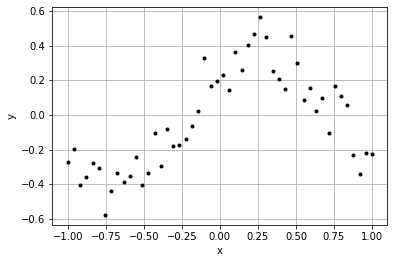

In [ ]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 특성값 정의
features = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train])
labels = y_train.reshape(-1, 1)

0 a: 0.09642634 b: 0.8171947 c: 0.47173756 loss: 0.40405476
500 a: 0.24206086 b: 0.29195935 c: -0.022389697 loss: 0.011020304
1000 a: 0.24206086 b: 0.29195935 c: -0.022389697 loss: 0.011020304
1500 a: 0.24206086 b: 0.29195935 c: -0.022389697 loss: 0.011020304


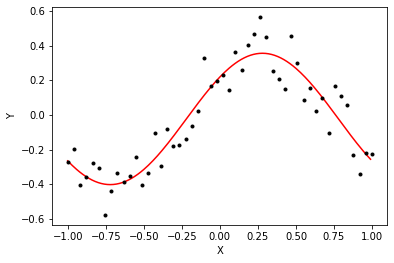

In [ ]:
X = x_train
Y = y_train

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

@tf.function
def compute_loss(): 
  # y_pred = a * cos(X) + b * sin(X) + c
  y_pred = a * np.cos(np.pi * X) + b * np.sin(np.pi * X) + c
  loss = tf.reduce_mean(tf.square(Y - y_pred))
  return loss

optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

for i in range(2000): 
  optimizer.minimize(compute_loss, var_list=[a, b, c])

  if i % 500 == 0: 
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * np.cos(np.pi * line_x) + b * np.sin(np.pi * line_x) + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'.k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Chapter 9
### 선형 분류 모델



###### 사전 파일

In [3]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf


def example_plot(xy, labels, a, b, title, filename=None):
    # Shape
    c_shape = ['bs', 'r^']

    # 1. Point
    for k, (point, label) in enumerate(zip(xy, labels),1):
        x,y = point
        plt.plot(x, y, c_shape[label[0]], mec='k')
        plt.text(x, y, '$P_{}$'.format(k), size=15, \
                 verticalalignment='top', horizontalalignment='left')

    # 2. Decision line
    tmp = np.linspace(0,1,500)
    decision_line = a * tmp + b
    plt.plot(tmp, decision_line, 'k-', linewidth=3)

    # 3. Contour
    X, Y = np.meshgrid(tmp, tmp)
    Z = np.zeros_like(X)
    Z[Y > a * X + b] = 1

    plt.contourf(X, Y, Z, cmap='coolwarm')
    # plt.axis('equal')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()


def example_plot_only_line(xy, labels, a, b, title, filename=None):
    # Shape
    c_shape = ['bs', 'r^']

    # 1. Point
    for k, (point, label) in enumerate(zip(xy, labels),1):
        x,y = point
        plt.plot(x, y, c_shape[label[0]], mec='k')
        plt.text(x, y, '$P_{}$'.format(k), size=15, \
                 verticalalignment='top', horizontalalignment='left')

    # 2. Decision line
    tmp = np.linspace(0,1,500)
    decision_line = a * tmp + b
    plt.plot(tmp, decision_line, 'k-', linewidth=3)

    # 3. Contour
#     X, Y = np.meshgrid(tmp, tmp)
#     Z = np.zeros_like(X)
#     Z[Y > a * X + b] = 1

#     plt.contourf(X, Y, Z, cmap='coolwarm')
    # plt.axis('equal')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

    
def example_plot_wo_contour(xy, labels, title, filename=None):
    # Shape
    c_shape = ['bs', 'r^']

    # 1. Point
    for k, (point, label) in enumerate(zip(xy, labels),1):
        x,y = point
        plt.plot(x, y, c_shape[label[0]], mec='k')
        plt.text(x, y, '$P_{}$'.format(k), size=15, \
                 verticalalignment='top', horizontalalignment='left')

#     # 2. Decision line
#     tmp = np.linspace(0,1,500)
#     decision_line = a * tmp + b
#     plt.plot(tmp, decision_line, 'k-', linewidth=3)

    # 3. Contour
#     X, Y = np.meshgrid(tmp, tmp)
#     Z = np.zeros_like(X)
#     Z[Y > a * X + b] = 1

#     plt.contourf(X, Y, Z, cmap='coolwarm')
    # plt.axis('equal')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

#### 이항 분류 모델



In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

In [ ]:
xy = np.array([[.2, .4], [.4, .2], [.65,.3], [.8, .5], [.5, .8], [.25, .8]])
labels = np.array([[0],[0],[0],[1],[1],[1]], dtype=np.int32)
print(xy)
print(labels)

[[0.2  0.4 ]
 [0.4  0.2 ]
 [0.65 0.3 ]
 [0.8  0.5 ]
 [0.5  0.8 ]
 [0.25 0.8 ]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


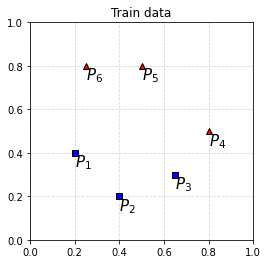

In [ ]:
plt.rcParams['figure.figsize'] = (4, 4)
example_plot_wo_contour(xy, labels, 'Train data')

##### 연속 확률 모델

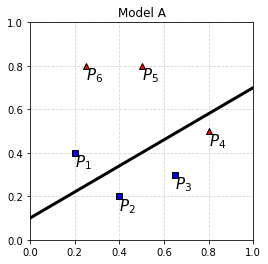

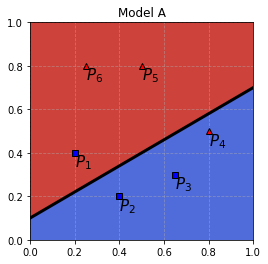

In [ ]:
example_plot_only_line(xy, labels, 0.6, .1, 'Model A')
example_plot(xy, labels, 0.6, .1, 'Model A')

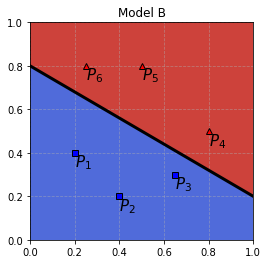

In [ ]:
example_plot(xy, labels, -.6, .8, 'Model B')

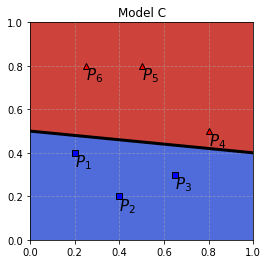

In [ ]:
example_plot(xy, labels, -.1, .5, 'Model C')

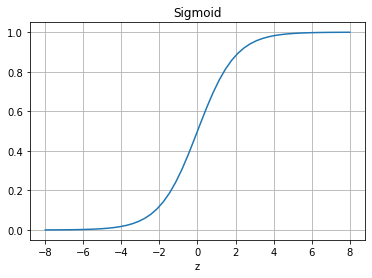

In [ ]:
tmp = np.linspace(-8,8)
sigmoid = lambda z:  1.0 / (1+np.exp(-z))

plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(tmp, sigmoid(tmp))
plt.grid()
plt.xlabel('z')
plt.title('Sigmoid')
plt.show()

##### 최대우도법과 크로스 엔트로피

- 최대우도법 : 학습용 정답 데이터를 정답이라고 예측할 확률을 최대화 하는 방법.



In [4]:
xy = np.array([[.2, .4], [.4, .2], [.65,.3], [.8, .5], [.5, .8], [.25, .8]])
labels = np.array([[0],[0],[0],[1],[1],[1]], dtype=np.int32)

In [6]:
# 예측모델 B
W = tf.Variable(np.array([[6],[10]]), dtype=tf.float64)
b = tf.Variable(np.array([-8]), dtype=tf.float64)

@tf.function
def predic(x):
  yhat =  tf.nn.sigmoid(tf.matmul(x, W) + b)
  return yhat

def loss_val(a, b):
  yhat = predic(a)
  #print(yhat)
  loss = tf.reduce_mean(- b * tf.math.log(yhat) - (1 - b) * tf.math.log(1-yhat))
  return loss 


loss_val(xy, labels)
a1 = -np.log(np.prod(predic(xy)))
b1 = loss_val(xy, labels) * len(xy)
print(a1, b1)



8.276303484494179 tf.Tensor(0.7763034844941787, shape=(), dtype=float64)
